In [52]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec
import seaborn as sns
import plotly.express as px
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score
from matplotlib.colors import ListedColormap
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from scipy.stats import t, sem
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

movies_df = pd.read_csv('movies.csv')

## FEATURE ENGINEERING :D 

#### Using Vader to get the sentiment score (YOU CAN SKIP THIS THE DATA BELOW ALREADY HAS THE VADER SCORE SAVED)

In [53]:
# analyzer = SentimentIntensityAnalyzer()
# 
# def get_vader_score(text):
#     if text != 'No reviews available': # If there is actually a review
#         return analyzer.polarity_scores(text)['compound']
#     else:
#         return 0 
# 
# movies_df['sentiment'] = movies_df['reviews'].apply(get_vader_score)
# 
# movies_df.to_csv('movies_data.csv', index = False)

In [54]:
# IF VADER SCORE HAS ALREADY BEEN RUN, JUST RUN THIS
movies = pd.read_csv('movies_data.csv')
# Clean and convert columns
movies['budget'] = pd.to_numeric(movies['budget'].str.strip().str.replace('[\$,]', '', regex=True))
movies['revenue'] = pd.to_numeric(movies['revenue'].str.strip().str.replace('[\$,]', '', regex=True))
movies.head()

,title,release_date,production_companies,genres,popularity,vote_average,vote_count,overview,reviews,budget,revenue,sentiment
0,Four Rooms,12/9/1995,"Miramax, A Band Apart",Comedy,15.843,5.853,2639,It's Ted the Bellhop's first night on the job....,No reviews available,4000000,4301000,0.0000
1,Finding Nemo,5/30/2003,Pixar,"Animation, Family",97.427,7.820,19227,"Nemo, an adventurous young clownfish, is unexp...",One of the best animated films I have ever see...,94000000,936094852,0.9976
2,Forrest Gump,6/23/1994,"Paramount Pictures, The Steve Tisch Company, W...","Comedy, Drama, Romance",95.507,8.470,27470,A man with a low IQ has accomplished great thi...,Best movie ever. This is the best movie ever! ...,55000000,679835137,0.9963
3,American Beauty,9/15/1999,"DreamWorks Pictures, Jinks/Cohen Company",Drama,31.884,8.000,12017,"Lester Burnham, a depressed suburban father in...",The film American Beauty to me is a film about...,15000000,356258047,0.9922
4,Dancer in the Dark,9/1/2000,"Zentropa Entertainments, DR, SVT Drama, ARTE, ...","Drama, Crime",16.923,7.878,1780,"Selma, a Czech immigrant on the verge of blind...",Dazzling Björk in this indictment against the ...,12500000,45556774,-0.5574


#### Genres and Production Companies

In [55]:
def convert_to_list(x):
    if isinstance(x, str) and x.strip():  # Check if x is a non-empty string
        return [item.strip() for item in x.split(',')]
    return ['not listed'] 

# Apply the conversion function to movies and production companies
movies['genres'] = movies['genres'].apply(convert_to_list)
movies['production_companies'] = movies['production_companies'].apply(convert_to_list)
movies.head()

,title,release_date,production_companies,genres,popularity,vote_average,vote_count,overview,reviews,budget,revenue,sentiment
0,Four Rooms,12/9/1995,"[Miramax, A Band Apart]",[Comedy],15.843,5.853,2639,It's Ted the Bellhop's first night on the job....,No reviews available,4000000,4301000,0.0000
1,Finding Nemo,5/30/2003,[Pixar],"[Animation, Family]",97.427,7.820,19227,"Nemo, an adventurous young clownfish, is unexp...",One of the best animated films I have ever see...,94000000,936094852,0.9976
2,Forrest Gump,6/23/1994,"[Paramount Pictures, The Steve Tisch Company, ...","[Comedy, Drama, Romance]",95.507,8.470,27470,A man with a low IQ has accomplished great thi...,Best movie ever. This is the best movie ever! ...,55000000,679835137,0.9963
3,American Beauty,9/15/1999,"[DreamWorks Pictures, Jinks/Cohen Company]",[Drama],31.884,8.000,12017,"Lester Burnham, a depressed suburban father in...",The film American Beauty to me is a film about...,15000000,356258047,0.9922
4,Dancer in the Dark,9/1/2000,"[Zentropa Entertainments, DR, SVT Drama, ARTE,...","[Drama, Crime]",16.923,7.878,1780,"Selma, a Czech immigrant on the verge of blind...",Dazzling Björk in this indictment against the ...,12500000,45556774,-0.5574


#### Getting release year/month/week

In [56]:
movies['release_date'] = pd.to_datetime(movies['release_date'])

# Extract year, month, and week number as new columns
movies['release_year'] = movies['release_date'].dt.year
movies['release_month'] = movies['release_date'].dt.month
movies['release_week'] = movies['release_date'].dt.isocalendar().week  # Week number of the year

movies.head()

,title,release_date,production_companies,genres,popularity,vote_average,vote_count,overview,reviews,budget,revenue,sentiment,release_year,release_month,release_week
0,Four Rooms,1995-12-09,"[Miramax, A Band Apart]",[Comedy],15.843,5.853,2639,It's Ted the Bellhop's first night on the job....,No reviews available,4000000,4301000,0.0000,1995,12,49
1,Finding Nemo,2003-05-30,[Pixar],"[Animation, Family]",97.427,7.820,19227,"Nemo, an adventurous young clownfish, is unexp...",One of the best animated films I have ever see...,94000000,936094852,0.9976,2003,5,22
2,Forrest Gump,1994-06-23,"[Paramount Pictures, The Steve Tisch Company, ...","[Comedy, Drama, Romance]",95.507,8.470,27470,A man with a low IQ has accomplished great thi...,Best movie ever. This is the best movie ever! ...,55000000,679835137,0.9963,1994,6,25
3,American Beauty,1999-09-15,"[DreamWorks Pictures, Jinks/Cohen Company]",[Drama],31.884,8.000,12017,"Lester Burnham, a depressed suburban father in...",The film American Beauty to me is a film about...,15000000,356258047,0.9922,1999,9,37
4,Dancer in the Dark,2000-09-01,"[Zentropa Entertainments, DR, SVT Drama, ARTE,...","[Drama, Crime]",16.923,7.878,1780,"Selma, a Czech immigrant on the verge of blind...",Dazzling Björk in this indictment against the ...,12500000,45556774,-0.5574,2000,9,35


#### Creating Holiday Variables

In [57]:
movies['thanksgiving_release'] = movies['release_week'].isin([46, 47]).astype(int)
movies['christmas_release'] = movies['release_week'].isin([50, 51]).astype(int)

print(f"Christmas movies: {movies['christmas_release'].sum()} \nThanksgiving Movies: {movies['thanksgiving_release'].sum()}")

Christmas movies: 127 
Thanksgiving Movies: 75


### Creating Production level: Based on average revenue and number of movies produced

In [58]:
# Step 1: Explode the 'production_companies' column and calculate average revenue and movie count
movies_exploded = movies.explode('production_companies')
company_stats = movies_exploded.groupby('production_companies').agg(
    avg_revenue=('revenue', 'mean'),
    movie_count=('production_companies', 'count')
).reset_index()

# Step 2: Apply log transformation to the revenue and movie count
company_stats['log_avg_revenue'] = np.log1p(company_stats['avg_revenue'])  # log(1 + revenue) to avoid log(0)
company_stats['log_movie_count'] = np.log1p(company_stats['movie_count'])  # log(1 + count) to handle 0s

# Step 3: Standardize the log-transformed features to balance their scale
scaler = StandardScaler()
company_stats[['log_avg_revenue', 'log_movie_count']] = scaler.fit_transform(company_stats[['log_avg_revenue', 'log_movie_count']])

# Step 4: Calculate the combined score based on standardized log-transformed revenue and movie count
alpha = 0.5  # Revenue weight
beta = 0.5  # Movie count weight
company_stats['score'] = alpha * company_stats['log_avg_revenue'] + beta * company_stats['log_movie_count']

# Step 5: Rank companies based on score and assign levels
top_threshold = company_stats['score'].quantile(0.95)  # Top 5% as top companies
mid_threshold = company_stats['score'].quantile(0.6)  # Middle 35% as mid-level companies

def classify_company(score):
    if score >= top_threshold:
        return 'Top-level'
    elif score >= mid_threshold:
        return 'Mid-level'
    else:
        return 'Low-level'

company_stats['production_level'] = company_stats['score'].apply(classify_company)

# Create a dictionary to map each company to its production level
production_level_map = company_stats.set_index('production_companies')['production_level'].to_dict()

# Step 6: Implement weighted average approach for categorizing movies based on their production companies
def weighted_average_level(companies):
    levels = [production_level_map.get(company, 'Low-level') for company in companies]
    
    # Assign numerical values for each level (Top-level: 3, Mid-level: 2, Low-level: 1)
    level_values = {'Top-level': 3, 'Mid-level': 2, 'Low-level': 1}
    numeric_levels = [level_values[level] for level in levels]

    # Compute the weighted average of levels for all companies
    avg_level = sum(numeric_levels) / len(numeric_levels) if numeric_levels else 1  # Default to 'Low-level' if no valid companies

    # Classify based on average level
    if avg_level >= 2.8:
        return 'Top'
    elif avg_level >= 2.0:
        return 'Mid'
    else:
        return 'Low'

# Step 7: Apply the weighted average approach to each movie
movies['production_level'] = movies['production_companies'].apply(weighted_average_level)

# View the top 20 companies and their production levels
movies.head()

,title,release_date,production_companies,genres,popularity,vote_average,vote_count,overview,reviews,budget,revenue,sentiment,release_year,release_month,release_week,thanksgiving_release,christmas_release,production_level
0,Four Rooms,1995-12-09,"[Miramax, A Band Apart]",[Comedy],15.843,5.853,2639,It's Ted the Bellhop's first night on the job....,No reviews available,4000000,4301000,0.0000,1995,12,49,0,0,Mid
1,Finding Nemo,2003-05-30,[Pixar],"[Animation, Family]",97.427,7.820,19227,"Nemo, an adventurous young clownfish, is unexp...",One of the best animated films I have ever see...,94000000,936094852,0.9976,2003,5,22,0,0,Top
2,Forrest Gump,1994-06-23,"[Paramount Pictures, The Steve Tisch Company, ...","[Comedy, Drama, Romance]",95.507,8.470,27470,A man with a low IQ has accomplished great thi...,Best movie ever. This is the best movie ever! ...,55000000,679835137,0.9963,1994,6,25,0,0,Mid
3,American Beauty,1999-09-15,"[DreamWorks Pictures, Jinks/Cohen Company]",[Drama],31.884,8.000,12017,"Lester Burnham, a depressed suburban father in...",The film American Beauty to me is a film about...,15000000,356258047,0.9922,1999,9,37,0,0,Mid
4,Dancer in the Dark,2000-09-01,"[Zentropa Entertainments, DR, SVT Drama, ARTE,...","[Drama, Crime]",16.923,7.878,1780,"Selma, a Czech immigrant on the verge of blind...",Dazzling Björk in this indictment against the ...,12500000,45556774,-0.5574,2000,9,35,0,0,Low


In [59]:
production_summary = movies.groupby('production_level').agg(
    total_revenue=('revenue', 'mean'),
    movie_count=('revenue', 'count')
).reset_index()

# Step 2: Display the summary
print(production_summary)

  production_level  total_revenue  movie_count
0              Low   3.976078e+07          344
1              Mid   1.503018e+08          886
2              Top   2.191090e+08          278


### Save the Updated Dataset :)

In [69]:
movies.to_csv('movies_main.csv')

### EDAAAAA

#### Time Series plot of total revenue per Month

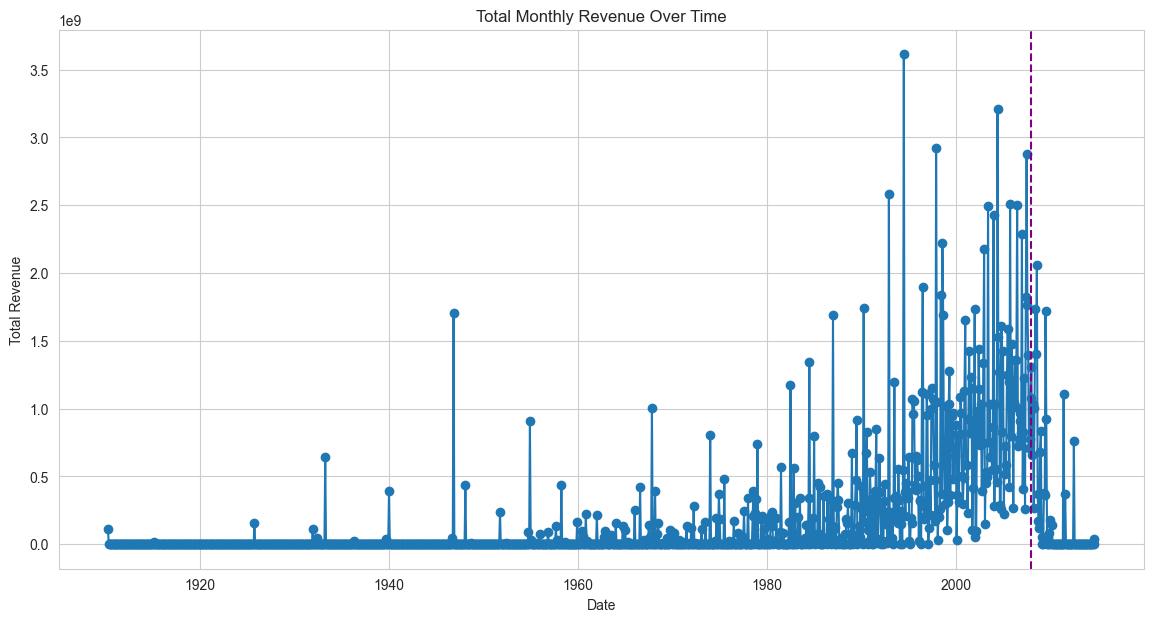

In [60]:
# Set 'release_date' as the index for time series plotting
movies1 = movies.set_index('release_date')

# Resample revenue data by month 
monthly_revenue = movies1['revenue'].resample('ME').sum()  # Sum revenue per month

# Step 4: Plot the time series
plt.figure(figsize=(14, 7))
plt.plot(monthly_revenue.index, monthly_revenue.values, marker='o')
plt.axvline(pd.to_datetime('2008-01-01'), color='purple', linestyle='--', label='2008 Market Crash')
plt.title('Total Monthly Revenue Over Time')
plt.xlabel('Date')
plt.ylabel('Total Revenue')
plt.grid(True)
plt.savefig('movies_time_series.png')
plt.show()

#### Line plot of average weekly revenue

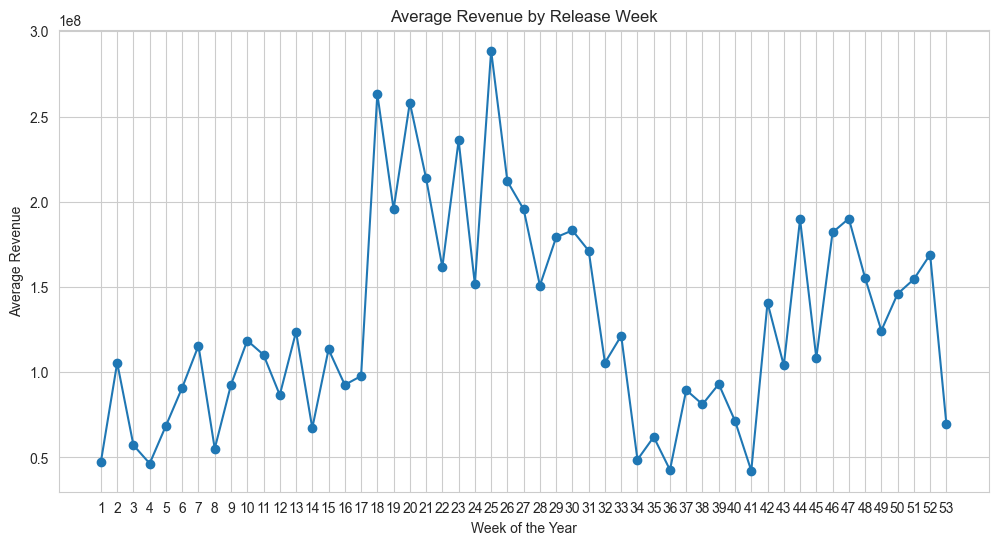

In [61]:
# Calculate average revenue for each week
weekly_revenue = movies.groupby('release_week')['revenue'].mean().reset_index()

# Step 3: Plot the correlation
plt.figure(figsize=(12, 6))
plt.plot(weekly_revenue['release_week'], weekly_revenue['revenue'], marker='o')
plt.title('Average Revenue by Release Week')
plt.xlabel('Week of the Year')
plt.ylabel('Average Revenue')
plt.xticks(range(1, 54))  # Weeks go from 1 to 53 in some years
plt.grid(True)
plt.savefig('movies_weekly_rev.png')
plt.show()

#### Nums and Figures :)

In [62]:
num_df = movies[['budget', 'revenue', 'popularity', 'vote_average', 'sentiment', 'release_year', 'release_week']].describe()

# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide axes
ax.axis('off')

# Create a table and add it to the axes
table = ax.table(cellText=num_df.values,
                 colLabels=num_df.columns,
                 rowLabels=num_df.index,
                 cellLoc='center', loc='center')

# Make column headers bold
for (i, j), cell in table.get_celld().items():
    if i == 0:  # This condition checks if it's a header row
        cell.set_text_props(fontweight='bold')
    if j == -1:  # This condition checks if it's a row label
        cell.set_text_props(fontweight='bold')

# Save the figure as an image
plt.savefig('movies_numeric_summary.png', bbox_inches='tight', dpi=300)
plt.close()  # Close the plot to free memory

In [63]:
sns.set_style("whitegrid")
sns.set_palette('tab10')

#### Scatterplot of Budget Vs Revenue with color for Sentiment

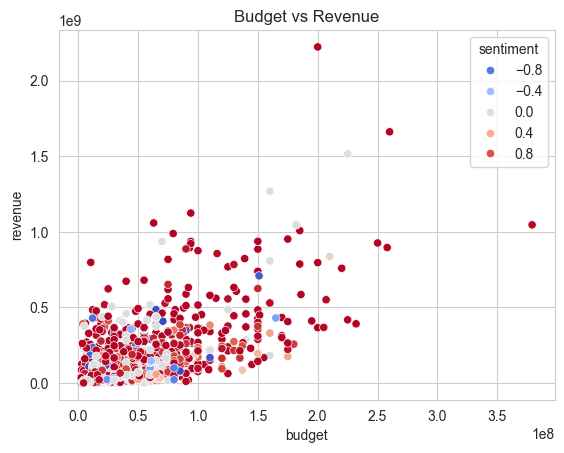

In [64]:
sns.scatterplot(movies, x = 'budget', y = 'revenue', hue = 'sentiment', palette= 'coolwarm')

plt.title("Budget vs Revenue")
plt.savefig("movies_budget_v_rev.png")
plt.show()
plt.close()

#### Histograms for Revenue and Budget

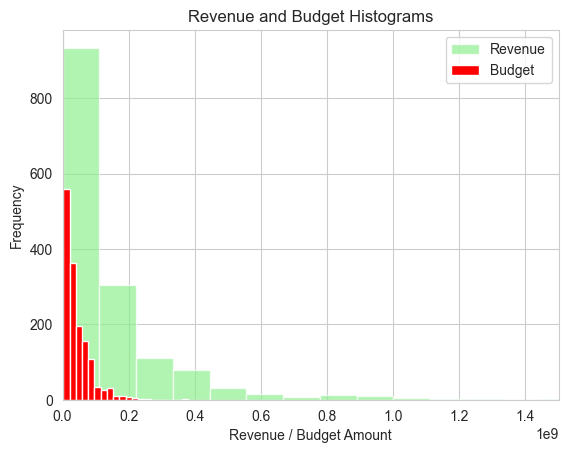

In [65]:
plt.hist(movies['revenue'], bins=20, color='lightgreen', alpha=0.7, label='Revenue')
plt.hist(movies['budget'], bins=20, color='red', label='Budget')

# Set the x-axis limit (max value to 1.5e+9)
plt.xlim(0, 1.5e9)
# Add a title and labels
plt.title('Revenue and Budget Histograms')

plt.xlabel('Revenue / Budget Amount')
plt.ylabel('Frequency')
plt.legend()

plt.savefig("movies_rev_budget_hist.png")
plt.show()

#### Correlation of Numeric Variables

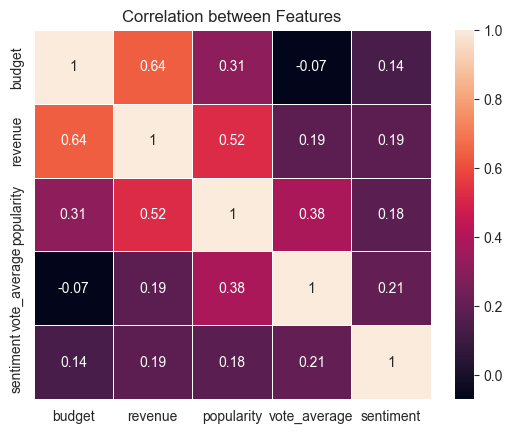

In [66]:
corr = movies[['budget', 'revenue', 'popularity', 'vote_average', 'sentiment']].corr()

sns.heatmap(corr, annot = True, linewidths=0.5)
plt.title('Correlation between Features')
plt.savefig('corr_plot.png')
plt.show()

#### Looking at Genres

We are going to need to use something like one-hot-encoding later that will take care of our problem where movies have multiple genres. I think it would be cool though to use them as dummy variables so we can still use genre to help predict earnings

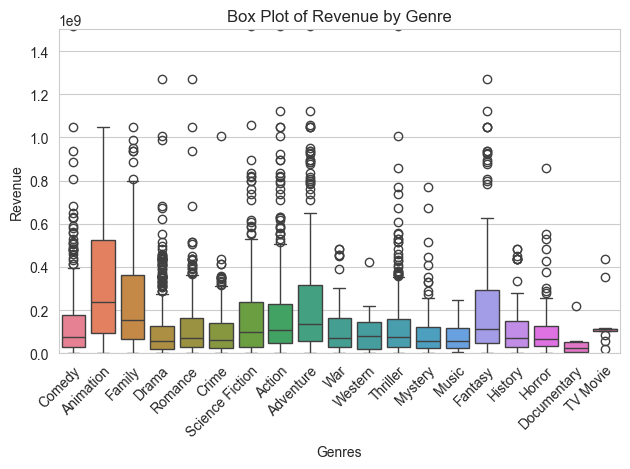

In [67]:
movies_genres = movies.explode('genres', )

sns.boxplot(movies_genres, x = 'genres', y = 'revenue', hue = 'genres')
# Set plot labels and title
plt.xlabel('Genres')
plt.ylabel('Revenue')
plt.title('Box Plot of Revenue by Genre')

# Limit the y-axis (adjust according to your dataset)
plt.ylim(0, 1.5e9)  # Example: limit to 1.5 billion

# Rotate x-axis labels for better visibility
plt.xticks(rotation=45, ha='right', rotation_mode='anchor')
plt.tight_layout()

plt.savefig("movies_genres.png")
plt.show()
plt.close()

In [68]:
movies_genres.head(20)

,title,release_date,production_companies,genres,popularity,vote_average,vote_count,overview,reviews,budget,revenue,sentiment,release_year,release_month,release_week,thanksgiving_release,christmas_release,production_level
0,Four Rooms,1995-12-09,"[Miramax, A Band Apart]",Comedy,15.843,5.853,2639,It's Ted the Bellhop's first night on the job....,No reviews available,4000000,4301000,0.0000,1995,12,49,0,0,Mid
1,Finding Nemo,2003-05-30,[Pixar],Animation,97.427,7.820,19227,"Nemo, an adventurous young clownfish, is unexp...",One of the best animated films I have ever see...,94000000,936094852,0.9976,2003,5,22,0,0,Top
1,Finding Nemo,2003-05-30,[Pixar],Family,97.427,7.820,19227,"Nemo, an adventurous young clownfish, is unexp...",One of the best animated films I have ever see...,94000000,936094852,0.9976,2003,5,22,0,0,Top
2,Forrest Gump,1994-06-23,"[Paramount Pictures, The Steve Tisch Company, ...",Comedy,95.507,8.470,27470,A man with a low IQ has accomplished great thi...,Best movie ever. This is the best movie ever! ...,55000000,679835137,0.9963,1994,6,25,0,0,Mid
2,Forrest Gump,1994-06-23,"[Paramount Pictures, The Steve Tisch Company, ...",Drama,95.507,8.470,27470,A man with a low IQ has accomplished great thi...,Best movie ever. This is the best movie ever! ...,55000000,679835137,0.9963,1994,6,25,0,0,Mid
2,Forrest Gump,1994-06-23,"[Paramount Pictures, The Steve Tisch Company, ...",Romance,95.507,8.470,27470,A man with a low IQ has accomplished great thi...,Best movie ever. This is the best movie ever! ...,55000000,679835137,0.9963,1994,6,25,0,0,Mid
3,American Beauty,1999-09-15,"[DreamWorks Pictures, Jinks/Cohen Company]",Drama,31.884,8.000,12017,"Lester Burnham, a depressed suburban father in...",The film American Beauty to me is a film about...,15000000,356258047,0.9922,1999,9,37,0,0,Mid
4,Dancer in the Dark,2000-09-01,"[Zentropa Entertainments, DR, SVT Drama, ARTE,...",Drama,16.923,7.878,1780,"Selma, a Czech immigrant on the verge of blind...",Dazzling Björk in this indictment against the ...,12500000,45556774,-0.5574,2000,9,35,0,0,Low
4,Dancer in the Dark,2000-09-01,"[Zentropa Entertainments, DR, SVT Drama, ARTE,...",Crime,16.923,7.878,1780,"Selma, a Czech immigrant on the verge of blind...",Dazzling Björk in this indictment against the ...,12500000,45556774,-0.5574,2000,9,35,0,0,Low
5,The Fifth Element,1997-05-02,[Gaumont],Science Fiction,54.901,7.553,10692,"In 2257, a taxi driver is unintentionally give...",This movie is one of the best movies of all ti...,95000000,263892271,0.9982,1997,5,18,0,0,Mid
